In [9]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style

In [10]:
style.use('ggplot')

In [16]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [17]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b

In [18]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared

In [19]:
xs, ys = create_dataset(40,40,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

19169.080018761724
42768.975000000006
0.5517994055559732


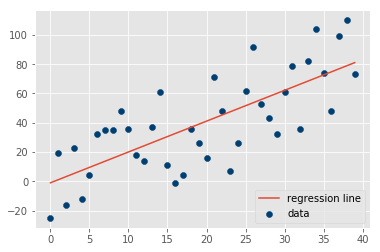

In [20]:
plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()